<a href="https://colab.research.google.com/github/NaomiInbal/anomaly-detection-and-trajectory-classification/blob/master/Route_classification_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection Model**

In [315]:
import pandas as pd
#read the tracks from path of csv file . and presents 10 tracks in a table
pd.options.display.max_columns = 25
df = pd.read_csv("https://data.transportation.gov/resource/8ect-6jqj.csv")
# Define the file path and name for the new file
file_path = "tracks_database.csv"
# Write the DataFrame to a new CSV file
df.to_csv(file_path, index=False)
print("print the first five rows from the tracks_database.csv file:")
print(df.head(5))
df = pd.DataFrame(df)

print the first five rows from the tracks_database.csv file:
   vehicle_id  frame_id  total_frames  global_time  local_x  local_y  \
0         352      3380          1156   1163368300   -5.359    0.000   
1         352      3379          1156   1163368200   -4.623    4.566   
2         352      3378          1156   1163368100   -4.707    7.606   
3         352      3377          1156   1163368000   -4.179   11.177   
4          39       208          1598   1163051100   11.573   12.311   

      global_x     global_y  v_length  v_width  v_class  v_vel  v_acc  \
0  2230502.921  1375532.938      15.0      6.5        2  33.96   0.00   
1  2230503.114  1375537.934      15.0      6.5        2  33.96   0.00   
2  2230502.731  1375540.951      15.0      6.5        2  33.96   0.00   
3  2230502.906  1375544.692      15.0      6.5        2  33.96  10.82   
4  2230518.568  1375546.762      15.0      7.0        2   0.25  -4.89   

   lane_id  o_zone  d_zone  int_id  section_id  direction  movement

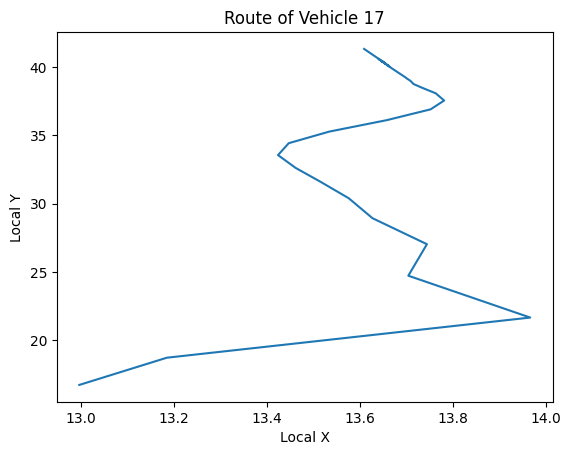

In [316]:
#Drawing a track by ID
import matplotlib.pyplot as plt
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv("https://data.transportation.gov/resource/8ect-6jqj.csv")

# Define the vehicle id for which you want to draw the route
vehicle_id = 17

# Filter the dataframe to keep only the data for the selected vehicle
df_vehicle = df[df['vehicle_id'] == vehicle_id]

# Extract the local_x and local_y coordinates for the selected vehicle
x = df_vehicle['local_x'].tolist()
y = df_vehicle['local_y'].tolist()

# Plot the route
plt.plot(x, y)
plt.xlabel("Local X")
plt.ylabel("Local Y")
plt.title(f"Route of Vehicle {vehicle_id}")
plt.show()


In [317]:
sorted_df = df.sort_values('global_time')
sorted_df.to_csv("tracks_database.csv")

**Add Noise Model**

In [318]:
#write a python function that takes 30 random cars track from the table with x
#and y coordinates and add some noise with normal distribution.
#Its add a colunm that mark if the cars track change or not. (1 if changed and 0 if not changed)
import pandas as pd
import numpy as np
import random

# Select 30 random vehicle ids from the dataframe
# Function to add noise to car tracks and mark changed tracks with 'accident' column
random_vehicle_ids = np.random.choice(df['vehicle_id'].unique(), 30, replace=False)
print("print the",30,"random vehicle ids that get noised:")
print(random_vehicle_ids)
df['accident'] = np.where(df['vehicle_id'].isin(random_vehicle_ids), 1, 0)

# Loop over the random vehicle ids and select one random row for each group
random_rows = []
for vehicle_id in random_vehicle_ids:
  group = df[df['vehicle_id'] == vehicle_id]
  if len(group) > 1:
    idx = group.iloc[1:].sample(n=1).index[0]
    random_rows.append(idx)

# Add noise to the local_x and local_y values of the selected rows
for idx in random_rows:
  df.loc[idx, 'local_x'] += random.uniform(-1, 1) # add noise to local_x value
  df.loc[idx, 'local_y'] += random.uniform(-1, 1) # add noise to local_y value


# Write the modified DataFrame back to a CSV file
df.to_csv("tracks_database_modified.csv", index=False)

print the 30 random vehicle ids that get noised:
[1343  546   53   63   21  847   36  570   15 1483  719 1336   95  859
  118   60  387  385 1335  120 1102 1311  990  116  999 1011  926  846
  619   89]



**Drawing the graphs before and after the changes**


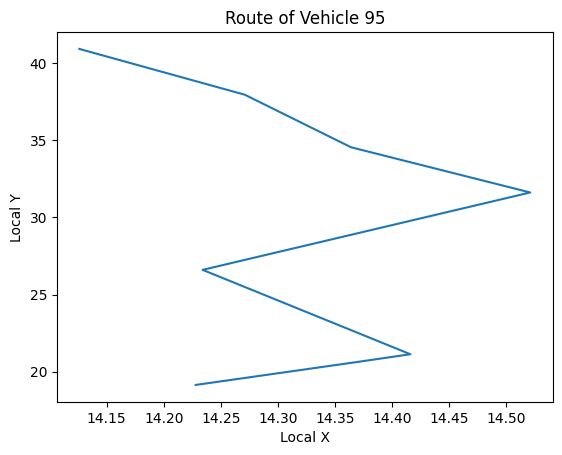

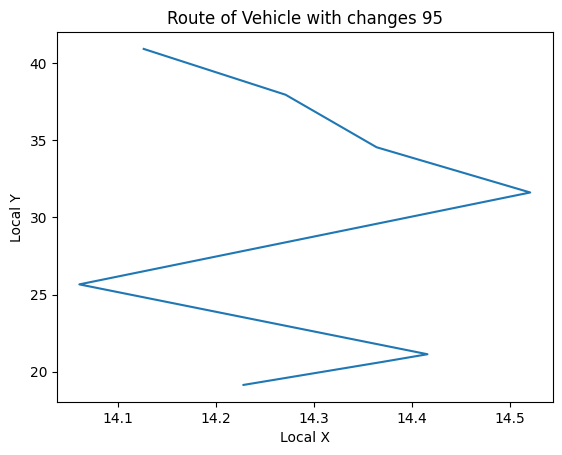

In [319]:
#Drawing the graphs before and after the changes
import matplotlib.pyplot as plt
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv("https://data.transportation.gov/resource/8ect-6jqj.csv")

# Define the vehicle id for which you want to draw the route
vehicle_id = 95

# Filter the dataframe to keep only the data for the selected vehicle
df_vehicle = df[df['vehicle_id'] == vehicle_id]

# Extract the local_x and local_y coordinates for the selected vehicle
x = df_vehicle['local_x'].tolist()
y = df_vehicle['local_y'].tolist()

# Plot the route
plt.plot(x, y)
plt.xlabel("Local X")
plt.ylabel("Local Y")
plt.title(f"Route of Vehicle {vehicle_id}")
plt.show()


import matplotlib.pyplot as plt
import pandas as pd

# Load the data into a pandas dataframe
df_modified = pd.read_csv("tracks_database_modified.csv")

# Define the vehicle id for which you want to draw the route
vehicle_id = 95

# Filter the dataframe to keep only the data for the selected vehicle
df_vehicle = df_modified[df_modified['vehicle_id'] == vehicle_id]

# Extract the local_x and local_y coordinates for the selected vehicle
x = df_vehicle['local_x'].tolist()
y = df_vehicle['local_y'].tolist()

# Plot the route
plt.plot(x, y)
plt.xlabel("Local X")
plt.ylabel("Local Y")
plt.title(f"Route of Vehicle with changes {vehicle_id}")
plt.show()



**Analysis Database Model**

In [320]:
#Database analysis
#Normalize the data,
#The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step.
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the local_x and local_y columns and add them as new columns in the DataFrame
df_modified['local_x_norm'] = scaler.fit_transform(df[['local_x']])
df_modified['local_y_norm'] = scaler.fit_transform(df[['local_y']])
# Write the DataFrame to the same CSV file
df_modified.to_csv("/content/tracks_database_modified.csv", index=False)



In [321]:
#Review the indicators.
df.describe()

,vehicle_id,frame_id,total_frames,global_time,local_x,local_y,global_x,global_y,v_length,v_width,v_class,v_vel,v_acc,lane_id,o_zone,d_zone,int_id,section_id,direction,movement,preceding,following,space_headway,time_headway
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,479.962000,2969.010000,1140.634000,1.163321e+09,14.550976,22.767401,2.230522e+06,1.375565e+06,16.823600,6.992000,2.065000,10.443980,-0.211480,1.332000,101.260000,213.431000,0.0,1.0,2.026000,1.0,447.714000,6.422000,63.705120,1788.194150
std,499.454225,3080.294682,491.084714,3.050972e+05,4.109004,12.237204,4.172243e+00,7.959508e+00,3.410553,0.062769,0.246649,12.482607,4.327846,1.453922,2.266614,5.515946,0.0,0.0,0.226661,0.0,498.455171,51.696503,103.814525,3785.573092
min,15.000000,45.000000,29.000000,1.163035e+09,-5.359000,0.000000,2.230503e+06,1.375533e+06,14.000000,6.500000,2.000000,0.000000,-12.270000,1.000000,101.000000,201.000000,0.0,1.0,2.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,39.000000,242.000000,799.000000,1.163050e+09,13.077000,14.584500,2.230520e+06,1.375558e+06,15.000000,7.000000,2.000000,0.240000,0.000000,1.000000,101.000000,214.000000,0.0,1.0,2.000000,1.0,17.000000,0.000000,25.710000,3.987500
50%,125.000000,911.500000,951.000000,1.163110e+09,14.005500,21.836000,2.230522e+06,1.375568e+06,16.000000,7.000000,2.000000,3.740000,0.000000,1.000000,101.000000,214.000000,0.0,1.0,2.000000,1.0,95.500000,0.000000,41.180000,9.715000
75%,869.000000,5638.250000,1598.000000,1.163582e+09,14.703000,34.442250,2.230523e+06,1.375572e+06,16.500000,7.000000,2.000000,20.170000,0.000000,1.000000,101.000000,215.000000,0.0,1.0,2.000000,1.0,864.000000,0.000000,58.790000,174.747500
max,1483.000000,8315.000000,2191.000000,1.163850e+09,24.615000,41.889000,2.230533e+06,1.375574e+06,29.100000,7.000000,3.000000,51.300000,12.270000,11.000000,121.000000,223.000000,0.0,1.0,4.000000,1.0,1476.000000,455.000000,1067.210000,9999.990000


In [322]:
import pandas as pd
import numpy as np

# Load data from CSV file
df_modified = pd.read_csv("tracks_database_modified.csv")

# Sort the DataFrame by 'global_time' to preserve the original order
sorted_df = df_modified.sort_values('global_time')

# Group by 'vehicle_id' and preserve the original order by using 'first' aggregation function
grouped = sorted_df.groupby("vehicle_id").apply(lambda x: pd.Series({
    "vehicle_id": x["vehicle_id"].iloc[0],  # Add vehicle_id column
    "local_x_norm": np.array(x["local_x_norm"]).astype(float).tolist(),
    "local_y_norm": x["local_y_norm"].astype(float).tolist(),
    "global_time": x["global_time"].astype(float).tolist(),
    "accident": int(x["accident"].all())
}))

# Reset the index to remove the multi-level index created by groupby
grouped.reset_index(drop=True, inplace=True)

# Save grouped data to CSV file
grouped.to_csv("tracks_database_modified.csv", index=False)



In [323]:
#Shows how many examples we have of each type to see if the database is balanced
import seaborn as sns
df_modified['accident'].value_counts()

0    638
1    362
Name: accident, dtype: int64

In [324]:
from scipy.stats import zscore

z = np.abs(zscore(df_modified.iloc[:,:4]))

print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


**LSTM**

In [325]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = np.array([[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]],
                 [[0.2, 0.3, 0.4], [0.5, 0.6, 0.7]],
                 [[0.3, 0.4, 0.5], [0.6, 0.7, 0.8]],
                 [[0.4, 0.5, 0.6], [0.7, 0.8, 0.9]],
                 [[1.0, 1.1, 1.2], [1.3, 1.4, 1.5]],
                 [[1.1, 1.2, 1.3], [1.4, 1.5, 1.6]],
                 [[1.2, 1.3, 1.4], [1.5, 1.6, 1.7]],
                 [[1.3, 1.4, 1.5], [1.6, 1.7, 1.8]]])

# Determining the tags of the routes - 0 for anomalous  and 1 for normal
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Dividing the data into training and testing groups
train_data = data[:6]
train_labels = labels[:6]
test_data = data[6:]
test_labels = labels[6:]

# Creating the model
model = Sequential()
model.add(LSTM(64, input_shape=(2, 3)))
model.add(Dense(1, activation='sigmoid'))

# Setting training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(train_data, train_labels, epochs=10, batch_size=2)

# Testing the model on the individual data
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Prepare a new track for testing
new_data = np.array([[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]])

#classification The new track
prediction = model.predict(new_data)
if prediction >= 0.5:
    print("The new route is anomalous")
else:
    print("The new route is normal")


Epoch 1/10
3/3 [==============================] - 5s 13ms/step - loss: 0.6914 - accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 0.6890 - accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6829 - accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6799 - accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6770 - accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6742 - accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6718 - accuracy: 0.3333
Epoch 8/10
3/3 [==============================] - 0s 12ms/step - loss: 0.6688 - accuracy: 0.3333
Epoch 9/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6655 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 7s 7s/step - loss: 0.5412 - accuracy: 1.0000
Test Loss: 0.5411825180053711
T

In [326]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read the CSV file using pandas
df = pd.read_csv("tracks_database_modified.csv")

# Convert the 'local_x' column values to floats
df['local_x_norm'] = df['local_x_norm'].apply(lambda x: np.fromstring(x.strip('[]'), sep=',').astype(float))
# Convert the 'local_y' column values to floats
df['local_y_norm'] = df['local_y_norm'].apply(lambda x: np.fromstring(x.strip('[]'), sep=',').astype(float))

# Initialize lists for 'local_x' and 'local_y' values
local_x_values = []
local_y_values = []

# Iterate over the values in 'local_x_norm' and 'local_y_norm' columns
for x_values, y_values in zip(df['local_x_norm'], df['local_y_norm']):
    local_x_values.extend(x_values)
    local_y_values.extend(y_values)

# Convert the lists to NumPy arrays
local_x = np.array(local_x_values).reshape(-1, 1)
local_y = np.array(local_y_values)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(local_x, local_y)

# Predict using the trained model
new_local_x = np.array([[1.5], [2.0]])  # Example new local_x values
predictions = model.predict(new_local_x)

# Print the predictions
print(predictions)


[0.54105843 0.53958732]


In [327]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Read the CSV file using pandas
df = pd.read_csv("tracks_database_modified.csv")

# Preprocess the data
local_x_values = df['local_x_norm'].apply(lambda x: np.fromstring(x.strip('[]'), sep=',').astype(float))
local_y_values = df['local_y_norm'].apply(lambda x: np.fromstring(x.strip('[]'), sep=',').astype(float))
labels = df['accident']  # Assuming you have a column 'accident_label' for the target variable

# Encode the target variable
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Pad sequences to ensure consistent length
X_train, X_test, y_train, y_test = train_test_split(local_x_values, labels_encoded, test_size=0.2, random_state=42)

max_seq_length = max(max(len(seq) for seq in X_train), max(len(seq) for seq in X_test))
X_train = pad_sequences(X_train.tolist(), maxlen=max_seq_length, padding='post', dtype='float32')
X_test = pad_sequences(X_test.tolist(), maxlen=max_seq_length, padding='post', dtype='float32')

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

# Classify new tracks using the trained model
new_track = np.array([[0.45, 0.852, 0.1254, 0.36, 0.23, 0.4],[0.5, 0.2, 0.3, 0.7, 0.2, 0.3]])  # Example new track values
new_track = pad_sequences(new_track, maxlen=max_seq_length, padding='post', dtype='float32')
new_track = new_track.reshape((new_track.shape[0], 1, new_track.shape[1]))
prediction = model.predict(new_track)


# Decode the prediction
# predicted_label = label_encoder.inverse_transform(np.round(prediction).astype(int))

#classification The new track
if prediction[0] >=0.5:
    print("The new route is anomalous")
else:
    print("The new route is normal")



Epoch 1/10
2/2 [==============================] - 3s 15ms/step - loss: 0.6861 - accuracy: 0.6885
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6882 - accuracy: 0.5574
Epoch 3/10
2/2 [==============================] - 0s 16ms/step - loss: 0.6849 - accuracy: 0.6230
Epoch 4/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6807 - accuracy: 0.6230
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6787 - accuracy: 0.6230
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6747 - accuracy: 0.6230
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6786 - accuracy: 0.6230
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6761 - accuracy: 0.6230
Epoch 9/10
2/2 [==============================] - 0s 17ms/step - loss: 0.6723 - accuracy: 0.6230
Epoch 10/10
1/1 [==============================] - 1s 583ms/step - loss: 0.6981 - accuracy: 0.5625
Accuracy: 56.25%
1/1 [======